In [1]:
using Percolation, PyPlot

# percolation

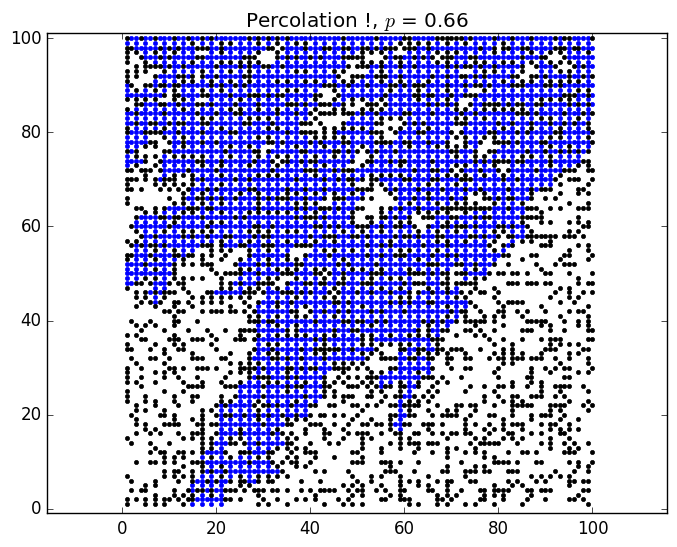

4-element Array{Int64,1}:
  -1
 101
  -1
 101

In [2]:
N = 100
p = 0.66
site = kagome(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

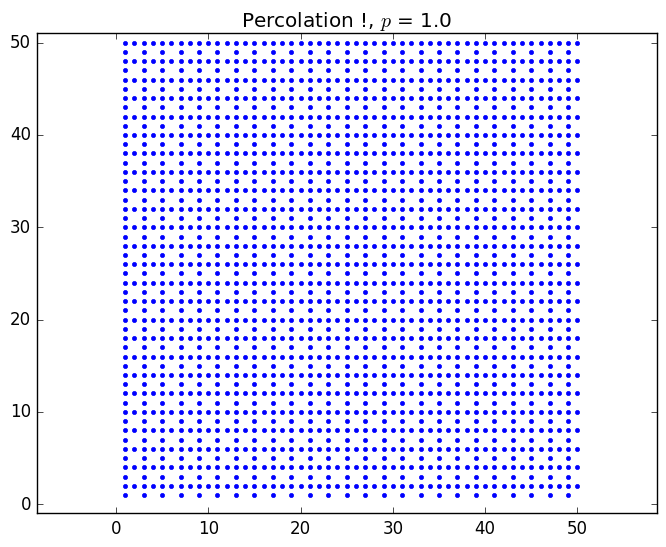

4-element Array{Int64,1}:
 -1
 51
 -1
 51

In [3]:
N = 50
p = 1.0
site = kagome(N, p)
percolation(site)
percolationplot(site)
axis([-1, N+1, -1, N+1])

# cluster

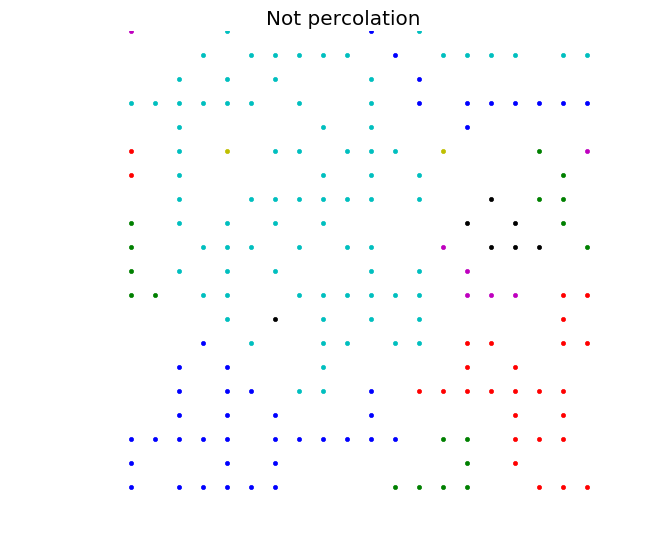

In [10]:
N = 20; p = 0.65
site = kagome(N, p)
cluster(site)
clusterplot(site)

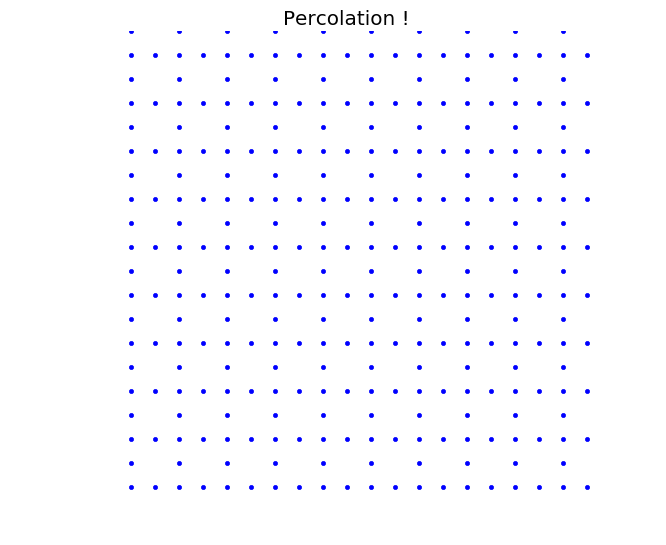

In [11]:
N = 20; p = 1.0
site = kagome(N, p)
cluster(site)
clusterplot(site)

# threshold

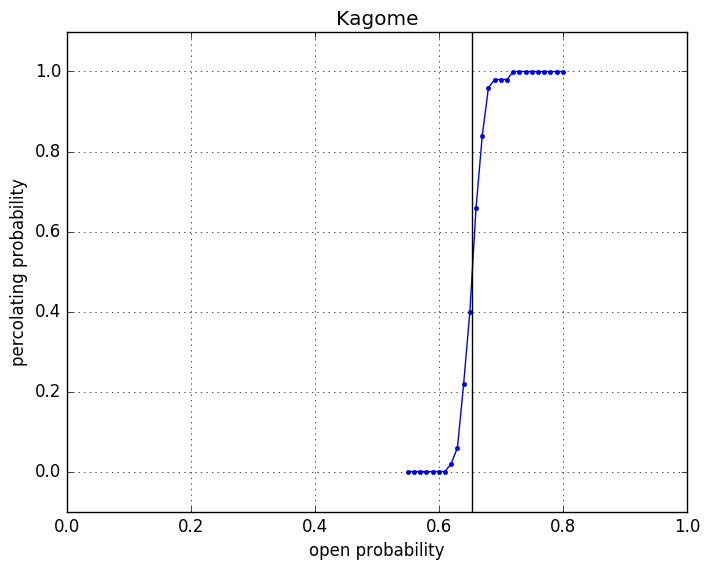

 13.552346 seconds (28.17 M allocations: 30.987 GB, 25.72% gc time)


In [5]:
plist = collect(0.55:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        hit[i] += percolation(site)
    end
end
hit /= trial;
plot(plist, hit, ".-");
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);

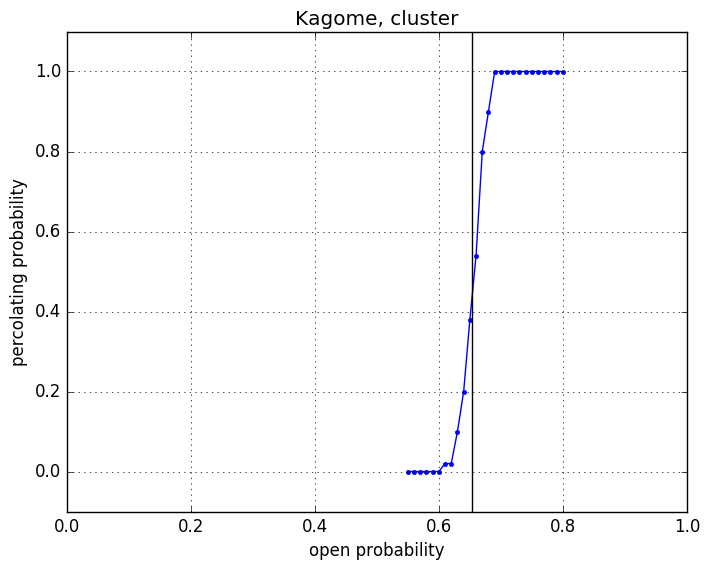

 95.219634 seconds (109.79 M allocations: 264.384 GB, 19.64% gc time)


In [12]:
# cluster
plist = collect(0.55:0.01:0.8)
hit = zeros(Int, length(plist))
N = 100; trial = 50
@time for i in 1:length(plist)
    for itr in 1:trial
        site = kagome(N, plist[i])
        cluster(site)
        hit[i] += site.PercolationOrNot
    end
end
hit /= trial;
plot(plist, hit, ".-")
plot([0.6527, 0.6527], [-0.5, 1.1], "k")
grid("on")
title("Kagome, cluster")
xlabel("open probability")
ylabel("percolating probability")
axis([0, 1, -0.1, 1.1]);